<a href="https://colab.research.google.com/github/MaxenceAr/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

In [49]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml(data_id=40945)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica.
Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variables created.

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
body Body number (if did not survive and body was recovered)



In [50]:
data, y = titanic.data, titanic.target
data.head(15)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(6)
memory usage: 115.4+ KB


In [52]:
y = y.astype(int)

In [53]:
y.info

<bound method Series.info of 0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64>

In [54]:
#Xe delete non intersting columns, or columns with too few values (cabin)
data_without_name_body_cabin_ticket=data.drop("name", axis=1)
data_without_name_body_cabin_ticket=data_without_name_body_cabin_ticket.drop("cabin", axis=1)
data_without_name_body_cabin_ticket=data_without_name_body_cabin_ticket.drop("body", axis=1)
data_without_name_body_cabin_ticket=data_without_name_body_cabin_ticket.drop("ticket", axis=1)

In [55]:
#We delete the lign where there is no value for the column fare
#We have to gather data and target for this step
data_without_name_body_cabin_ticket['target'] = y
data_without_name_body_cabin_ticket = data_without_name_body_cabin_ticket.dropna(subset=["fare"])
y=data_without_name_body_cabin_ticket['target']
data_without_name_body_cabin_ticket=data_without_name_body_cabin_ticket.drop("target",axis=1)

In [56]:
data_without_name_body_cabin_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1308 non-null   float64 
 1   sex        1308 non-null   category
 2   age        1045 non-null   float64 
 3   sibsp      1308 non-null   float64 
 4   parch      1308 non-null   float64 
 5   fare       1308 non-null   float64 
 6   embarked   1306 non-null   category
 7   boat       486 non-null    object  
 8   home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(2)
memory usage: 84.6+ KB


In [57]:
cat_features=["pclass","sex","embarked","home.dest","boat"]

In [58]:
num_features=["age","sibsp","parch","fare"]

In [59]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])


In [61]:
from sklearn.linear_model import LogisticRegression
logi_clf=LogisticRegression()
pipeline_reg_logi = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logi_clf)
])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_clf)
])

In [63]:
from sklearn.ensemble import RandomForestClassifier
rdm_forest_clf=RandomForestClassifier()

numerical_transformer_whithout_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),

])

categorical_transformer_without_one_hot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor_just_imput = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_whithout_scaler, num_features),
        ('cat', categorical_transformer, cat_features)
    ])
pipeline_rdm_forest=Pipeline(steps=[('prepo',preprocessor_just_imput),('classifier',rdm_forest_clf)])

In [64]:
#we divide our dataset into a training set (80% of the sample), and a test one (20%). There is the same proportion of survivors among the twice.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_without_name_body_cabin_ticket, y, test_size=0.2, stratify=y)

In [65]:
pipeline_reg_logi.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'home.dest', 'boat'])])),
                ('classifier', LogisticRegression())])

In [66]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'home.dest', 'boat'])])),
                ('classifier', KNeighborsClassifier())])

In [67]:
pipeline_rdm_forest.fit(X_train,y_train)

Pipeline(steps=[('prepo',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex', 'embarked',
                                                   'home.dest', 'boat'])])),
                ('classifier', RandomForestClassifier())])

In [68]:
y_test_predict_reg=pipeline_reg_logi.predict(X_test)
y_test_predict_knn=pipeline_knn.predict(X_test)
y_test_predict_rdm_forest=pipeline_rdm_forest.predict(X_test)

In [69]:
from sklearn.metrics import recall_score
recall_reg=recall_score(y_test, y_test_predict_reg)
recall_knn=recall_score(y_test,y_test_predict_knn)
recall_rdm_forest=recall_score(y_test,y_test_predict_rdm_forest)

In [70]:
print(f"recall(logistic regression) : {recall_reg}")
print(f"recall(KNN) : {recall_knn}")
print(f"recall(random_forest) : {recall_rdm_forest}")

recall(logistic regression) : 0.96
recall(KNN) : 0.83
recall(random_forest) : 0.96


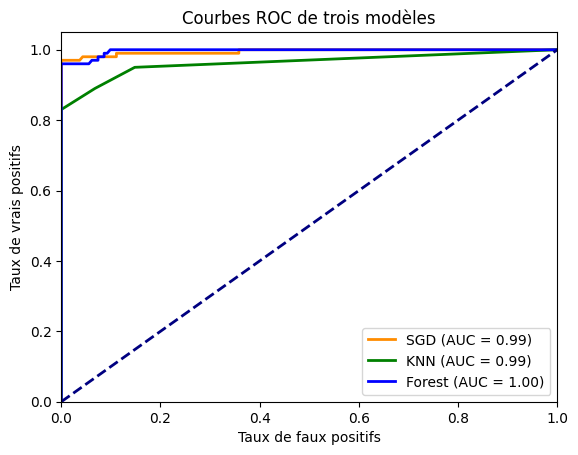

In [76]:
# Obtenez les probabilités prédites pour les exemples de test
y_scores_reg = pipeline_reg_logi.predict_proba(X_test)[:, 1]
y_scores_knn= pipeline_knn.predict_proba(X_test)[:, 1]
y_scores_rdm_forest= pipeline_rdm_forest.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr_reg, tprreg, thresholdsreg = roc_curve(y_test, y_scores_reg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
fpr_rdm_forest, tpr_rdm_forest, thresholds_rdm_forest = roc_curve(y_test, y_scores_rdm_forest)

# Calculez l'AUC (aire sous la courbe ROC)
roc_auc_reg = roc_auc_score(y_test, y_scores_reg)
roc_auc_knn = roc_auc_score(y_test, y_scores_knn)
roc_auc_rdm_forest = roc_auc_score(y_test,y_scores_rdm_forest)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_reg, tprreg, color='darkorange', lw=2, label='SGD (AUC = %0.2f)' % roc_auc_reg)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_reg)
plt.plot(fpr_rdm_forest, tpr_rdm_forest, color='blue', lw=2, label='Forest (AUC = %0.2f)' % roc_auc_rdm_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC de trois modèles')
plt.legend(loc="lower right")
plt.show()

Manque de données pour avoir des belles courbes
=> utiliser cross validation

In [80]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utilisez make_scorer pour définir le rappel comme métrique de score
scorer = make_scorer(recall_score, pos_label=1)  # Assurez-vous de spécifier le pos_label approprié

# Effectuez la validation croisée en utilisant le rappel comme métrique
recall_scores_reg = cross_val_score(pipeline_reg_logi,data_without_name_body_cabin_ticket , y, cv=cv, scoring=scorer)
recall_scores_knn = cross_val_score(pipeline_knn,data_without_name_body_cabin_ticket , y, cv=cv, scoring=scorer)
recall_scores_rdm_forest = cross_val_score(pipeline_rdm_forest,data_without_name_body_cabin_ticket , y, cv=cv, scoring=scorer)


mean_recall_reg = recall_scores_reg.mean()
mean_recall_knn = recall_scores_knn.mean()
mean_recall_rdm_forest = recall_scores_rdm_forest.mean()

print("Rappel moyen de la régression logique sur toutes les validations croisées:", mean_recall_reg)
print("Rappel moyen de KNN sur toutes les validations croisées:", mean_recall_knn)
print("Rappel moyen de Random FOrest toutes les validations croisées:", mean_recall_rdm_forest)


Rappel moyen de la régression logique sur toutes les validations croisées: 0.9540000000000001
Rappel moyen de KNN sur toutes les validations croisées: 0.8160000000000001
Rappel moyen de Random FOrest toutes les validations croisées: 0.96
